In [5]:
import time
import torch
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)
print(df)


X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape,y_train.shape)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

C:\Users\Zainch-032\AppData\Local\Temp\ipykernel_9576\2986184255.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
C:\Users\Zainch-032\AppData\Local\Temp\ipykernel_9576\2986184255.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)


Epoch 1, Train Loss: 0.0357, Validation Loss: 0.6451
Epoch 2, Train Loss: 0.0175, Validation Loss: 0.5464
Epoch 3, Train Loss: 0.0155, Validation Loss: 0.5052
Epoch 4, Train Loss: 0.0148, Validation Loss: 0.4898
Epoch 5, Train Loss: 0.0144, Validation Loss: 0.4804
Epoch 6, Train Loss: 0.0141, Validation Loss: 0.4706
Epoch 7, Train Loss: 0.0138, Validation Loss: 0.4654
Epoch 8, Train Loss: 0.0136, Validation Loss: 0.4573
Epoch 9, Train Loss: 0.0134, Validation Loss: 0.4495
Epoch 10, Train Loss: 0.0131, Validation Loss: 0.4436
Epoch 11, Train Loss: 0.0130, Validation Loss: 0.4392
Epoch 12, Train Loss: 0.0128, Validation Loss: 0.4317
Epoch 13, Train Loss: 0.0126, Validation Loss: 0.4256
Epoch 14, Train Loss: 0.0125, Validation Loss: 0.4235
Epoch 15, Train Loss: 0.0124, Validation Loss: 0.4195
Epoch 16, Train Loss: 0.0122, Validation Loss: 0.4164
Epoch 17, Train Loss: 0.0121, Validation Loss: 0.4175
Epoch 18, Train Loss: 0.0120, Validation Loss: 0.4075
Epoch 19, Train Loss: 0.0119, Validat

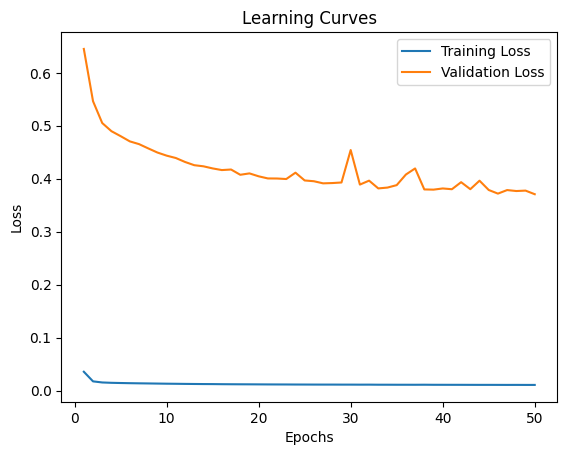

Test Loss (MSE): 0.3572
Mean Absolute Error (MAE): 0.4124
R² Score: 0.7274
Training Time: 18.79 seconds


In [6]:
class RegressionNN:
    def __init__(self, n_inputs, n_neurons):
        self.weights = torch.randn(n_inputs, n_neurons) * 0.01
        self.biases = torch.zeros(1, n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        self.output = torch.matmul(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)
        self.dbiases = torch.sum(dvalues, axis=0, keepdim=True)
        self.dinputs = torch.matmul(dvalues, self.weights.T)

class ActivationReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = torch.maximum(inputs, torch.zeros_like(inputs))

    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

class LossMeanSquaredError:
    def forward(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2)

    def backward(self, y_pred, y_true):
        samples = len(y_pred)
        self.dinputs = (2 / samples) * (y_pred - y_true)


layer1 = RegressionNN(8, 64)  # California housing data has 8 features
activation1 = ActivationReLU()
layer2 = RegressionNN(64, 1)  # Single output for regression
loss_function = LossMeanSquaredError()

# Hyperparameters
learning_rate = 0.01
epochs = 50
batch_size = 32

# Helper function for batching
def create_batches(X, y, batch_size):
    for i in range(0, len(X), batch_size):
        yield X[i:i + batch_size], y[i:i + batch_size]

# Train-Validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Training loop
train_losses, val_losses = [], []
start_time = time.time()

for epoch in range(epochs):
    epoch_loss = 0
    
   
    permutation = torch.randperm(X_train.size(0))
    X_train = X_train[permutation]
    y_train = y_train[permutation]

    for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
        # Forward pass
        layer1.forward(X_batch)
        activation1.forward(layer1.output)
        layer2.forward(activation1.output)

        # Compute loss
        loss = loss_function.forward(layer2.output, y_batch)
        epoch_loss += loss.item()

        # Backward pass
        loss_function.backward(layer2.output, y_batch)
        layer2.backward(loss_function.dinputs)
        activation1.backward(layer2.dinputs)
        layer1.backward(activation1.dinputs)

        # Update parameters
        layer1.weights -= learning_rate * layer1.dweights
        layer1.biases -= learning_rate * layer1.dbiases
        layer2.weights -= learning_rate * layer2.dweights
        layer2.biases -= learning_rate * layer2.dbiases

    # Log training loss
    train_losses.append(epoch_loss / len(X_train))

    # Validation pass
    layer1.forward(X_val)
    activation1.forward(layer1.output)
    layer2.forward(activation1.output)
    val_loss = loss_function.forward(layer2.output, y_val)
    val_losses.append(val_loss.item())

    # Print epoch results
    print(f"Epoch {epoch + 1}, Train Loss: {train_losses[-1]:.4f}, Validation Loss: {val_losses[-1]:.4f}")

end_time = time.time()

# Plot learning curves
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Evaluate on test data
layer1.forward(X_test)
activation1.forward(layer1.output)
layer2.forward(activation1.output)
test_loss = loss_function.forward(layer2.output, y_test)

y_test_pred = layer2.output.detach().numpy()
y_test_true = y_test.numpy()
mae = mean_absolute_error(y_test_true, y_test_pred)
r2 = r2_score(y_test_true, y_test_pred)

print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Training Time: {end_time - start_time:.2f} seconds")

